# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [248]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from shapely.geometry import Point, Polygon
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data_train.csv',index_col='Unnamed: 0')
column_names = df.columns

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17290 non-null  datetime64[ns]
 1   price          17290 non-null  float64       
 2   bedrooms       17290 non-null  int64         
 3   sqft_living    17290 non-null  int64         
 4   sqft_lot       17290 non-null  int64         
 5   floors         17290 non-null  float64       
 6   waterfront     17290 non-null  int64         
 7   view           17290 non-null  int64         
 8   condition      17290 non-null  int64         
 9   sqft_basement  17290 non-null  int64         
 10  yr_built       17290 non-null  int64         
 11  yr_renovated   17290 non-null  int64         
 12  zipcode        17290 non-null  object        
 13  lat            17290 non-null  float64       
 14  long           17290 non-null  float64       
 15  sqft_living15  1729

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [5]:
df['zipcode'] = df['zipcode'].astype('str')

In [6]:
df.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='zipcode'>

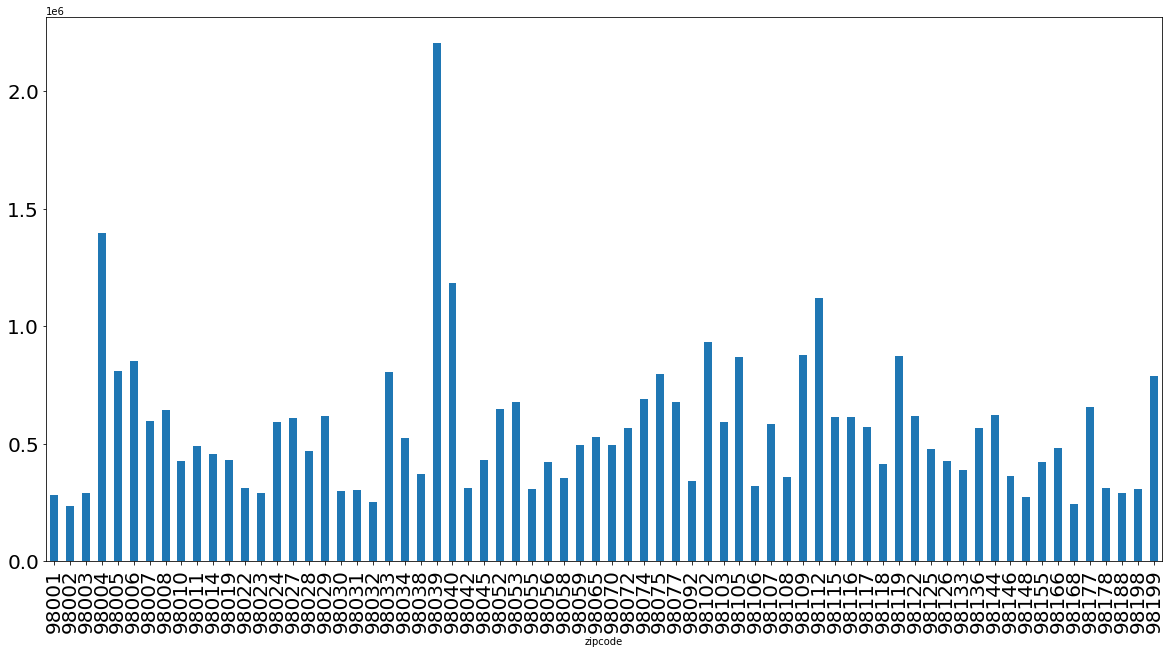

In [7]:
df.groupby('zipcode')['price'].mean().plot(kind='bar',figsize=(20,10),fontsize=20)

In [268]:
df.groupby('grade')['price'].mean().plot(kind='bar')

KeyError: 'grade'

In [32]:
df.groupby('renovated')['price'].mean().plot(kind='bar')

KeyError: 'renovated'

In [30]:
bins = [1900, 1925, 1950, 1975, 2000, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins, include_lowest=True, labels = ('1900-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2015'))
bins_yr_built = bins_yr_built.cat.as_unordered()


<AxesSubplot:xlabel='Year_bin'>

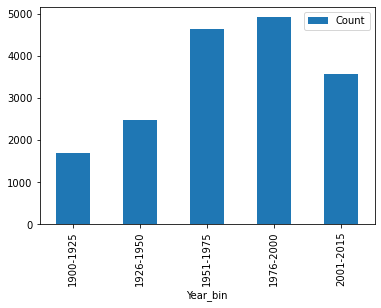

In [31]:
df_plot_me = pd.DataFrame({'Year_bin': bins_yr_built.values, 'Count':1})
df_plot_me.groupby('Year_bin').sum().plot(kind='bar')

In [ ]:
df.groupby('zipcode')['has_basement'].describe()

In [ ]:
df.groupby('zipcode')['has_basement'].count().plot(kind='barh',figsize=(30,30),fontsize=24)

In [ ]:
df['renovated_age'].value_counts(ascending=False)

In [11]:
df = df.drop(['id'], axis=1)

<AxesSubplot:>

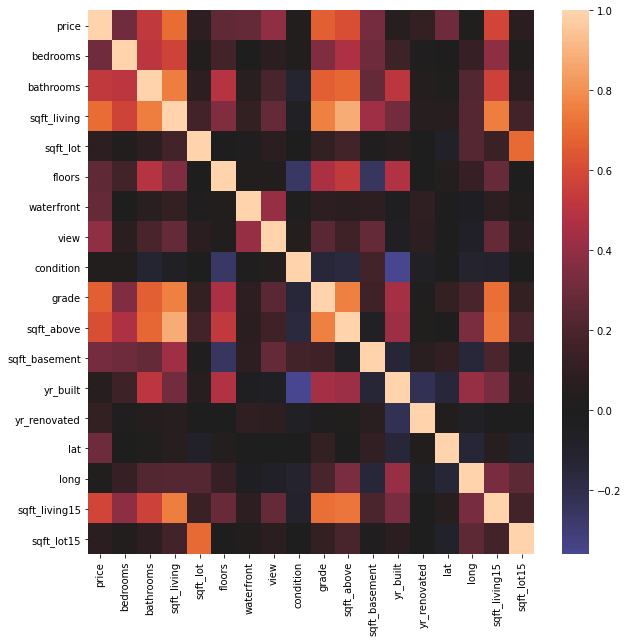

In [13]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,center=0)

In [14]:
abs(corr) >0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [16]:
# These are highly correlated with price so I dropped them
#Condition column gives a similar data point from grade
#sqft seems more valuable than the number of bathrooms
#sqft above directly correlates with sqft
df.drop(['bathrooms'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)
df.drop(['sqft_above'], axis=1, inplace=True)

KeyError: "['bathrooms'] not found in axis"

<AxesSubplot:>

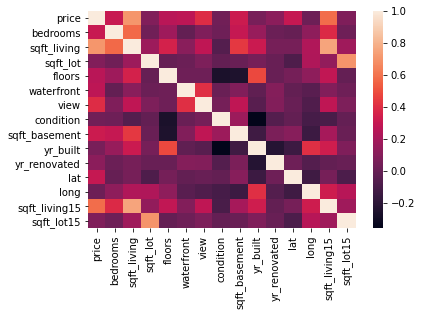

In [17]:
sns.heatmap(df.corr())

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [ ]:
#Changes the 33 bedrooms to 3
df['bedrooms'] = np.where(df['bedrooms'] == 33, 3, df['bedrooms'] )
df['bedrooms'].describe()

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [ ]:
#age of the house
df['age'] = 2015 - df['yr_built']

In [ ]:
#house built by decade
df['decade'] = df['age']//10

In [44]:
#if the house was renovated
df['renovated']=df['yr_renovated'].apply(lambda x:1 if x>0 else 0)

In [45]:
#if the house has a basement
df['has_basement'] = df['sqft_basement'].apply(lambda x:1 if x>0 else 0)

In [ ]:
#how long since the house was renovated
df['renovated_age'] = 2015- df['yr_renovated']
df['renovated_age'] = df['renovated_age'].apply(lambda x:0 if x>100 else x)

In [ ]:
check_column(df['waterfront'],10)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [47]:
categorical = df[['month','view','condition','yr_built','yr_renovated','zipcode','renovated','has_basement']].copy()
numerical = df[['price','bedrooms','sqft_living','floors','sqft_lot','sqft_basement','lat','long','sqft_living15','sqft_lot15']].copy()

In [40]:
bins = [0, 1, 4] 
bins_view = pd.cut(categorical['view'], bins, include_lowest=True, labels=['not_viewed', 'viewed'])
bins_view = bins_view.cat.as_unordered()

In [41]:
bins = [1900, 1925, 1950, 1975, 2000, 2015]
bins_yr_built = pd.cut(categorical['yr_built'], bins, include_lowest=True, labels = ('1900-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2015'))
bins_yr_built = bins_yr_built.cat.as_unordered()

In [49]:
categorical = categorical.drop(['view', 'month', 'yr_built','yr_renovated'], axis=1)
categorical = pd.concat([categorical, bins_date, bins_view, bins_yr_built,], axis=1)

In [51]:
categorical['month'] = categorical['month'].astype('str')
categorical['view'] = categorical['view'].astype('str')
categorical['condition'] = categorical['condition'].astype('str')
categorical['zipcode'] = categorical['zipcode'].astype('str')
categorical['renovated'] = categorical['renovated'].astype('str')
categorical['has_basement'] = categorical['has_basement'].astype('str')
categorical['yr_built'] = categorical['yr_built'].astype('str')

In [52]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   condition     17290 non-null  object
 1   zipcode       17290 non-null  object
 2   renovated     17290 non-null  object
 3   has_basement  17290 non-null  object
 4   month         17290 non-null  object
 5   view          17290 non-null  object
 6   yr_built      17290 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [53]:
categorical = pd.get_dummies(categorical)
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   condition_1         17290 non-null  uint8
 1   condition_2         17290 non-null  uint8
 2   condition_3         17290 non-null  uint8
 3   condition_4         17290 non-null  uint8
 4   condition_5         17290 non-null  uint8
 5   zipcode_98001       17290 non-null  uint8
 6   zipcode_98002       17290 non-null  uint8
 7   zipcode_98003       17290 non-null  uint8
 8   zipcode_98004       17290 non-null  uint8
 9   zipcode_98005       17290 non-null  uint8
 10  zipcode_98006       17290 non-null  uint8
 11  zipcode_98007       17290 non-null  uint8
 12  zipcode_98008       17290 non-null  uint8
 13  zipcode_98010       17290 non-null  uint8
 14  zipcode_98011       17290 non-null  uint8
 15  zipcode_98014       17290 non-null  uint8
 16  zipcode_98019       17290 non-null  uint

<AxesSubplot:>

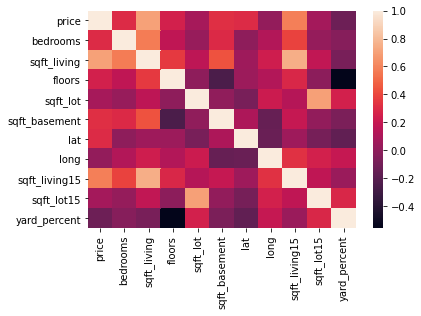

In [59]:
num_corr = numerical.corr()
abs(num_corr) > .75

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,yard_percent
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,True,False,False
floors,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,False
sqft_living15,False,False,True,False,False,False,False,False,True,False,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True,False


In [62]:
final = pd.concat([numerical, categorical],axis=1)
final.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Spring,month_Summer,month_Winter,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015
0,365000.0,4,2070,2.0,8893,0,47.4388,-122.162,2390,7700,...,0,0,0,1,0,0,0,0,1,0
1,865000.0,5,2900,1.0,6730,1070,47.6784,-122.285,2370,6283,...,1,0,0,1,0,0,0,0,1,0
2,1038000.0,4,3770,2.0,10893,0,47.5646,-122.129,3710,9685,...,1,0,0,0,1,0,0,0,1,0
3,1490000.0,3,4560,2.0,14608,0,47.6995,-122.228,4050,14226,...,0,0,1,0,1,0,0,0,1,0
4,711000.0,3,2550,2.0,5376,0,47.6647,-122.083,2250,4050,...,1,0,0,1,0,0,0,0,0,1


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [18]:
#your code here
df.date = pd.to_datetime(df.date)

In [19]:
df['month'] = df.date.dt.month

In [22]:
df.month =df.month.replace(12,0)

In [24]:
bins = [0,3,6,9,11]
bins_date = pd.cut(df['month'], bins, include_lowest=True, labels=['Winter','Summer','Spring','Fall'])
bins_date = bins_date.cat.as_unordered()

<AxesSubplot:>

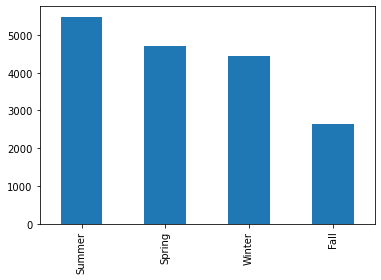

In [28]:
bins_date.value_counts().plot(kind='bar')

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 
df['renovated']=df['yr_renovated'].apply(lambda x:1 if x>0 else 0)


In [ ]:
df['renovated_age'] = 2015- df['yr_renovated']
df['renovated_age'] = df['renovated_age'].apply(lambda x:0 if x>100 else x)

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here
poly = PolynomialFeatures(degree=2,include_bias=False)
features = ['sqft_living','age']
df_features = df[features]
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly=pd.DataFrame(poly_data,columns=poly_columns)
df_poly.head()

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
poly = PolynomialFeatures(degree)
poly_data = poly.fit_transform()


## Step 5: Model Evaluation



## 5.1)  Fit an initial model and check the errors to see if the model assumptions are being met. If need be, go back to steps 3 and 4 to improve your mdoel. 

In [75]:
predictors = final[['yr_built_1900-1925', 'yr_built_1926-1950', 'yr_built_1951-1975', 'yr_built_1976-2000', 'yr_built_2001-2015',]]
X = predictors
y = pd.DataFrame(final['price'])

In [76]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     98.03
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.21e-82
Time:                        19:59:49   Log-Likelihood:            -2.4617e+05
No. Observations:               17290   AIC:                         4.924e+05
Df Residuals:                   17285   BIC:                         4.924e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
yr_built_1900-1925  5.973e+05   8975.504     66.553      0.000     5.8e+05    6.15e+05
yr_built_1926-1950  5.075e+05   7436.191     68.253      0.000    4.93e+05    5.22e+05
yr_built_1951-1975   4.71e+05   5415.925     86.975      0.000     4.6e+05    4.82e+05
yr_built_1976-2000   5.46e+05   5265.128    103.701      0.000    5.36e+05    5.56e+05
yr_built_2001-2015  6.203e+05   6179.961    100.377      0.000    6.08e+05    6.32e+05
==============================================================================
Omnibus:                    16121.439   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1153420.725
Skew:                           4.315   Prob(JB):                         0.00
Kurtosis:                      42.071   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
predict2 = final[['month_Winter', 'month_Spring', 'month_Summer', 'month_Fall']]

In [266]:
X = predict2
y = pd.DataFrame(final['price'])

In [267]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.427
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           5.74e-05
Time:                        11:31:07   Log-Likelihood:            -2.4636e+05
No. Observations:               17290   AIC:                         4.927e+05
Df Residuals:                   17286   BIC:                         4.928e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
month_Winter  5.245e+05   5594.428     93.747      0.000    5.13e+05    5.35e+05
month_Spring  5.379e+05   5436.603     98.942      0.000    5.27e+05    5.49e+05
month_Summer  5.589e+05   5037.902    110.942      0.000    5.49e+05    5.69e+05
month_Fall    5.355e+05   7252.055     73.838      0.000    5.21e+05     5.5e+05
==============================================================================
Omnibus:                    16033.092   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121623.252
Skew:                           4.284   Prob(JB):                         0.00
Kurtosis:                      41.516   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.2) Perform a train-test split of the data.

In [160]:
final.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Spring,month_Summer,month_Winter,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015
0,365000.0,4,2070,2.0,8893,0,47.4388,-122.162,2390,7700,...,0,0,0,1,0,0,0,0,1,0
1,865000.0,5,2900,1.0,6730,1070,47.6784,-122.285,2370,6283,...,1,0,0,1,0,0,0,0,1,0
2,1038000.0,4,3770,2.0,10893,0,47.5646,-122.129,3710,9685,...,1,0,0,0,1,0,0,0,1,0
3,1490000.0,3,4560,2.0,14608,0,47.6995,-122.228,4050,14226,...,0,0,1,0,1,0,0,0,1,0
4,711000.0,3,2550,2.0,5376,0,47.6647,-122.083,2250,4050,...,1,0,0,1,0,0,0,0,0,1


In [204]:
features = final[['has_basement_1','has_basement_0','renovated_1','renovated_0','month_Summer','month_Winter','month_Spring','month_Fall','sqft_lot','floors','sqft_basement', 'sqft_living15','sqft_lot15','sqft_living','zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']]

In [205]:
X = features
y = final['price']

In [206]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     607.3
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:46:03   Log-Likelihood:            -2.3477e+05
No. Observations:               17290   AIC:                         4.697e+05
Df Residuals:                   17209   BIC:                         4.703e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
has_basement_1 -8325.5015   4404.964     -1.890      0.059    -1.7e+04     308.677
has_basement_0  2.255e+04   3629.289      6.214      0.000    1.54e+04    2.97e+04
renovated_1      4.75e+04   5645.371      8.415      0.000    3.64e+04    5.86e+04
renovated_0    -3.328e+04   3508.313     -9.485      0.000   -4.02e+04   -2.64e+04
month_Summer    1.411e+04   2764.406      5.105      0.000    8693.003    1.95e+04
month_Winter    8410.0399   2902.975      2.897      0.004    2719.913    1.41e+04
month_Spring   -4534.3000   2865.466     -1.582      0.114   -1.02e+04    1082.306
month_Fall     -3761.5668   3434.864     -1.095      0.273   -1.05e+04    2971.116
sqft_lot           0.2882      0.049      5.903      0.000       0.193       0.384
floors         -3.986e+04   3610.962    -11.038      0.000   -4.69e+04   -3.28e+04
sqft_basement    -41.9852      7.093     -5.919      0.000     -55.888     -28.082
sqft_living15     61.8394      3.633     17.022      0.000      54.718      68.960
sqft_lot15        -0.0813      0.079     -1.031      0.303      -0.236       0.073
sqft_living      247.9510      3.161     78.449      0.000     241.756     254.146
zipcode_98001  -2.299e+05   1.13e+04    -20.270      0.000   -2.52e+05   -2.08e+05
zipcode_98002  -1.968e+05   1.52e+04    -12.921      0.000   -2.27e+05   -1.67e+05
zipcode_98003  -2.271e+05   1.27e+04    -17.831      0.000   -2.52e+05   -2.02e+05
zipcode_98004   5.781e+05   1.26e+04     45.955      0.000    5.53e+05    6.03e+05
zipcode_98005   7.563e+04   1.61e+04      4.685      0.000     4.4e+04    1.07e+05
zipcode_98006   6.752e+04      1e+04      6.740      0.000    4.79e+04    8.72e+04
zipcode_98007   3.115e+04   1.72e+04      1.813      0.070   -2530.441    6.48e+04
zipcode_98008    6.91e+04   1.27e+04      5.437      0.000    4.42e+04     9.4e+04
zipcode_98010  -1.723e+05   2.21e+04     -7.804      0.000   -2.16e+05   -1.29e+05
zipcode_98011   -1.19e+05   1.49e+04     -7.987      0.000   -1.48e+05   -8.98e+04
zipcode_98014  -1.335e+05   1.93e+04     -6.934      0.000   -1.71e+05   -9.58e+04
zipcode_98019  -1.759e+05   1.58e+04    -11.112      0.000   -2.07e+05   -1.45e+05
zipcode_98022  -2.039e+05    1.4e+04    -14.529      0.000   -2.31e+05   -1.76e+05
zipcode_98023  -2.476e+05   9496.170    -26.073      0.000   -2.66e+05   -2.29e+05
zipcode_98024  -8.485e+04   2.38e+04     -3.561      0.000   -1.32e+05   -3.81e+04
zipcode_98027  -5.859e+04   1.06e+04     -5.539      0.000   -7.93e+04   -3.79e+04
zipcode_98028   -1.06e+05   1.29e+04     -8.232      0.000   -1.31e+05   -8.08e+04
zipcode_98029  -3220.2353   1.22e+04     -0.265      0.791   -2.71e+04    2.06e+04
zipcode_98030  -2.356e+05   1.34e+04    -17.545      0.000   -2.62e+05   -2.09e+05
zipcode_98031  -2.201e+05    1.3e+04    -16.942      0.000   -2.46e+05   -1.95e+05
zipcode_9803

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=9,test_size=0.2)

### 5.3) Fit the model to the training data.

In [210]:
lm = LinearRegression()

In [211]:
lm = lm.fit(X_train, y_train)

### 5.4) Use the model to predict on the training set and the test set.

In [212]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [213]:
train_residuals = y_train_pred - y_train
test_residuals = y_test_pred - y_test

### 5.5) Evaluate the training and test predictions using RMSE.

In [214]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Train Root Mean Squared Error: ', train_mse)
print('Test Root Mean Squared Error: ', test_mse)

Train Root Mean Squared Error:  286077.9082149828
Test Root Mean Squared Error:  280544.0065526972


In [215]:
test_rmse/final['price'].std()

0.47292486627502744

### 5.6) Determine if your model is overfit.

In [ ]:
#your ctestode here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models. You will have to repeat steps 5.3 through 5.6 to determine how your new model is performing. 

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [216]:
#instantiate a linear regression object
lm_kbest = LinearRegression()
#fit the linear regression to the data
lm_kbest.fit(X, y)
y_train_kbest = lm_kbest.predict(X_train)
trainK_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)
y_kbest = lm_kbest.predict(X_test)
testK_rmse = np.sqrt(mean_squared_error(y_test_pred, y_kbest))
print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 6937.448943700507
Testing Root Mean Squared Error: 7603.685161412952


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [224]:
# your code here
ols = LinearRegression()

selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)

selector.fit(X_train, y_train)

RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [225]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [226]:
len(selected_rfe)

84

In [220]:
selected_rfe

Index(['has_basement_1', 'has_basement_0', 'renovated_1', 'renovated_0',
       'month_Summer', 'month_Winter', 'month_Spring', 'month_Fall',
       'sqft_lot', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'sqft_living', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_

## Step 7: Compare the RMSE of your different models that use differen features and determine the best model overall.

In [239]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)



In [240]:
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [241]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 194506.82654321406
Testing Root Mean Squared Error: 176551.82810293406


## Step 8:  Refit your best model to the entire dataset.

In [244]:
lm_rfe.coef_

array([ 3.02168183e+11,  3.02168222e+11,  4.28893732e+04, -4.28909163e+04,
        1.05227256e+04,  3.43670302e+03, -8.90923877e+03, -5.05095199e+03,
        3.55690002e-01, -3.86258730e+04, -2.93487310e+01,  6.39173498e+01,
       -1.37901306e-01,  2.46580788e+02, -2.33010673e+05, -1.94760454e+05,
       -2.19376598e+05,  5.84719237e+05,  9.16499382e+04,  6.57401046e+04,
        3.10390449e+04,  7.92294073e+04, -1.68450494e+05, -1.13322543e+05,
       -1.35655806e+05, -1.73464409e+05, -2.10850782e+05, -2.43093531e+05,
       -9.50166835e+04, -6.36535602e+04, -1.09947427e+05, -5.31945053e+02,
       -2.33451325e+05, -2.19799934e+05, -2.03903651e+05,  1.49642191e+05,
        7.08456539e+03, -2.23613665e+05,  1.09082155e+06,  3.49267956e+05,
       -2.27173516e+05, -1.19010665e+05,  5.14489795e+03, -5.29765709e+04,
       -1.76960215e+05, -1.25806035e+05, -1.96671458e+05, -1.68112530e+05,
       -1.78516817e+05, -4.55583872e+04, -8.70095456e+04, -3.61829584e+04,
       -4.99106267e+04, -

In [245]:
lm_final.coef_

array([-9.42011248e+11, -9.42011217e+11,  4.04014453e+04, -4.03966817e+04,
        1.05459472e+04,  4.86074010e+03, -8.09270117e+03, -7.31259544e+03,
        2.89337158e-01, -3.98745427e+04, -4.19460239e+01,  6.18210030e+01,
       -8.08334351e-02,  2.47933064e+02, -2.30290510e+05, -1.96187593e+05,
       -2.27435496e+05,  5.78055676e+05,  7.53661934e+04,  6.72471745e+04,
        3.17134920e+04,  6.87335523e+04, -1.72342474e+05, -1.19395037e+05,
       -1.33556241e+05, -1.76530321e+05, -2.04489911e+05, -2.47697008e+05,
       -8.51646547e+04, -5.87204091e+04, -1.06384239e+05, -3.55505733e+03,
       -2.35758693e+05, -2.20482987e+05, -1.99802667e+05,  1.56207158e+05,
       -3.41550887e+03, -2.20686609e+05,  1.14167326e+06,  3.35413983e+05,
       -2.26961213e+05, -1.23761108e+05,  9.03719030e+02, -5.56152130e+04,
       -1.76070548e+05, -1.20348376e+05, -1.99420653e+05, -1.71023409e+05,
       -1.77890210e+05, -3.80107073e+04, -8.42935287e+04, -3.94110690e+04,
       -4.65089923e+04, -

In [272]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(final[selected_rfe], final['price'])

In [271]:
lm

LinearRegression()

In [235]:
len(lm.coef_)

84

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [247]:
import pickle

pickle_out = open('model.pickle','wb')
pickle.dump(lm_final,pickle_out)
pickle_out.close()

In [261]:
other_info=final[selected_rfe]

In [262]:
pickle_out = open('other_info.pkl',"wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()